In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("../dataset/cleaned/laptops_cleaned.csv")

In [49]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Cpu_brand,Cpu_speed,ScreenWidth,ScreenHeight
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,Intel Core i5,2.3,2560,1600
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,Intel Core i5,1.8,1440,900
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,Intel Core i5 7200U,2.5,1920,1080
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,Intel Core i7,2.7,2880,1800
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,Intel Core i5,3.1,2560,1600


In [50]:
df.tail()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Cpu_brand,Cpu_speed,ScreenWidth,ScreenHeight
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,638.0,128,0,0,0,Intel Core i7 6500U,2.5,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1499.0,512,0,0,0,Intel Core i7 6500U,2.5,3200,1800
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,229.0,0,0,0,64,Intel Celeron Dual Core N3050,1.6,1366,768
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,764.0,0,1024,0,0,Intel Core i7 6500U,2.5,1366,768
1302,Asus,Notebook,15.6,4,Intel HD Graphics,Windows 10,2.20,369.0,0,500,0,0,Intel Celeron Dual Core N3050,1.6,1366,768


In [51]:
import re

def extract_resolution(resolution):
    match = re.search(r'(\d+)x(\d+)', resolution)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None





#save the cleaned dataframe
df.to_csv("../dataset/cleaned/laptops_cleaned.csv", index=False)

df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Cpu_brand,Cpu_speed,ScreenWidth,ScreenHeight
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,Intel Core i5,2.3,2560,1600
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,Intel Core i5,1.8,1440,900
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,Intel Core i5 7200U,2.5,1920,1080
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,Intel Core i7,2.7,2880,1800
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,Intel Core i5,3.1,2560,1600


In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define categorical & numerical columns
categorical_cols = ['Company', 'TypeName', 'Cpu_brand', 'Gpu', 'OpSys']

numerical_cols = ['Inches', 'Ram', 'Weight', 'SSD', 'HDD', 'Hybrid', 
                  'Flash_Storage', 'Cpu_speed', 
                  'ScreenWidth', 'ScreenHeight']

# Preprocessor: encode categorical, pass through numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# Full pipeline with Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Features and target
X = df.drop(columns=['Price_euros'])  # drop target + raw resolution text
y = df['Price_euros']

# Fit the model
model.fit(X, y)

print("Model training complete ✅")


Model training complete ✅


In [53]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30
)

# Fit again, but on training data only
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [54]:
import numpy as np

# Predictions on train and test sets
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Show first 10 results for training set
print("Prediction on Training set:\n", np.round(y_train_pred[:10], 4))
print("\nActual Training data:\n", y_train[:10].values)

# Show first 10 results for test set
print("\nPrediction Test set:\n", np.round(y_pred[:10], 4))
print("\nActual Test data:\n", y_test[:10].values)


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Prediction on Training set:
 [ 695.9768  648.0964  711.2117  812.7342 1290.2774  969.9905  696.2161
  646.27   1006.1429 1415.7774]

Actual Training data:
 [ 865.    776.    735.07  649.   1165.    579.    649.    646.27  859.01
 1279.  ]

Prediction Test set:
 [1387.1185 1337.1303  429.4161  186.3678 1042.6004 1220.1471 1240.6334
 1667.5692 1859.4558 2529.8625]

Actual Test data:
 [1875.   1268.    403.5   369.    911.   1180.    931.88 1389.   1399.
 2968.  ]


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.8410
Mean Absolute Error (MAE): 214.78
Root Mean Squared Error (RMSE): 306.90


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


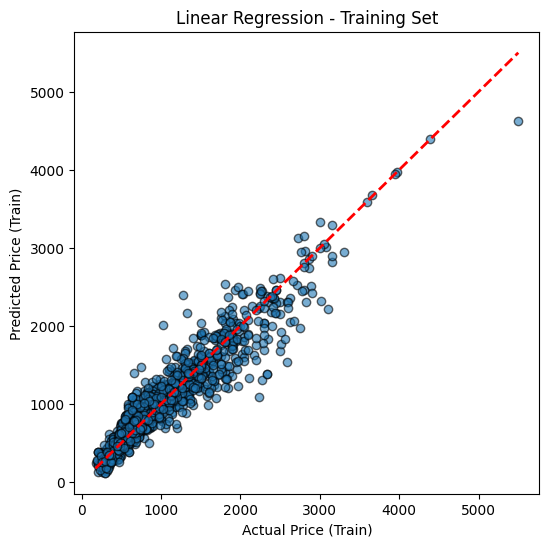

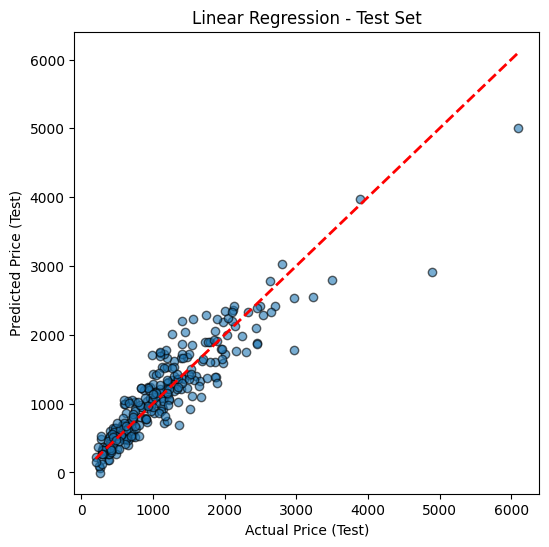

In [56]:
import matplotlib.pyplot as plt

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot for training set
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='k')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Price (Train)")
plt.ylabel("Predicted Price (Train)")
plt.title("Linear Regression - Training Set")
plt.show()

# Plot for test set
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Price (Test)")
plt.ylabel("Predicted Price (Test)")
plt.title("Linear Regression - Test Set")
plt.show()


In [57]:
import joblib
joblib.dump(model, "../models/laptop_price_model.pkl")


['../models/laptop_price_model.pkl']